In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

import pandas as pd
import numpy as np

from quant_invest_lab.data_provider import build_multi_crypto_dataframe, download_crypto_historical_data
from scipy.stats import entropy

In [3]:
MININUM_HISTORY_YEAR = 2
N = 365
# get_list_of_symbols()
symbols = set(
    [
        "ROSE-USDT",
        "AVAX-USDT",
        "UNI-USDT",
        "ATOM-USDT",
        "ICP-USDT",
        "THETA-USDT",
        "VET-USDT",
        "DOGE3S-USDT",
        "BNB-USDT",
        "NEAR-BTC",
        "BTC-USDT",
        "NEAR-USDT",
        "SOLVE-BTC",
        "ETH-USDT",
        "KDA-USDT",
        "SOL-USDT",
        "EGLD-USDT",
        "ALGO-USDT",
        "FTM-USDT",
        "AXS-USDT",
        "ADA-USDT",
        "NKN-USDT",
        "LOOM-BTC",
        "LTC3L-USDT",
        "XPR-USDT",
    ]
)


closes = build_multi_crypto_dataframe(symbols)

cols_to_remove = [
    col
    for col, nans in closes.isna().sum().items()
    if len(closes) - nans < int(N * MININUM_HISTORY_YEAR)
]


closes.drop(columns=cols_to_remove, inplace=True)
returns = closes.pct_change().dropna()
log_returns = np.log(closes).pct_change().dropna()
returns.head()

Fetching symbols...: 100%|██████████| 25/25 [00:45<00:00,  1.81s/it]


,ROSE-USDT_Close,SOLVE-BTC_Close,NEAR-BTC_Close,ICP-USDT_Close,THETA-USDT_Close,ALGO-USDT_Close,XPR-USDT_Close,VET-USDT_Close,ETH-USDT_Close,ADA-USDT_Close,...,KDA-USDT_Close,BNB-USDT_Close,AVAX-USDT_Close,BTC-USDT_Close,AXS-USDT_Close,SOL-USDT_Close,LTC3L-USDT_Close,UNI-USDT_Close,LOOM-BTC_Close,FTM-USDT_Close
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-25 02:00:00,0.044651,0.000000,0.077286,0.049966,0.020619,0.022893,-0.043121,0.052390,0.017891,0.007544,...,0.067293,0.066640,-0.168885,0.027709,0.036219,0.019919,0.062903,0.013539,0.075829,0.037287
2021-08-26 02:00:00,-0.070689,-0.079787,-0.090989,-0.090032,-0.095215,-0.067895,-0.118026,-0.092411,-0.041898,-0.077059,...,-0.083942,-0.050108,-0.104534,-0.043968,-0.040360,0.037795,-0.170724,-0.055407,-0.030837,-0.131195
2021-08-27 02:00:00,0.085536,0.000000,0.043311,0.108127,0.065222,0.073850,0.029197,0.105449,0.058336,0.165497,...,0.165407,0.034101,0.211650,0.047504,0.058530,0.178374,0.148065,0.074005,-0.022727,0.136630
2021-08-28 02:00:00,-0.020706,0.011561,0.073801,0.038106,-0.003769,-0.024803,0.054374,-0.037458,-0.008557,-0.033784,...,-0.022751,-0.017017,0.000519,-0.003345,0.014625,0.090503,-0.022560,-0.022307,-0.009302,0.061920
2021-08-29 02:00:00,0.056676,0.005714,-0.024055,0.106282,-0.000823,-0.015222,-0.035874,0.002407,-0.006362,0.001065,...,-0.023040,-0.012709,-0.055146,-0.002594,0.047738,-0.018144,0.000000,0.000134,-0.018779,0.119219


In [8]:
corr_df = closes.corr()
THRESHOLD = 0.6
binarized_corr = corr_df.abs() > THRESHOLD
np.fill_diagonal(binarized_corr.values, 0)
adjency_matrix = binarized_corr.astype(int)
adjency_matrix

,ROSE-USDT_Close,SOLVE-BTC_Close,NEAR-BTC_Close,ICP-USDT_Close,THETA-USDT_Close,ALGO-USDT_Close,XPR-USDT_Close,VET-USDT_Close,ETH-USDT_Close,ADA-USDT_Close,...,KDA-USDT_Close,BNB-USDT_Close,AVAX-USDT_Close,BTC-USDT_Close,AXS-USDT_Close,SOL-USDT_Close,LTC3L-USDT_Close,UNI-USDT_Close,LOOM-BTC_Close,FTM-USDT_Close
ROSE-USDT_Close,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,1,1,0,0,0,1
SOLVE-BTC_Close,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
NEAR-BTC_Close,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ICP-USDT_Close,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,0
THETA-USDT_Close,0,1,0,1,0,1,1,1,0,1,...,0,1,0,1,1,1,1,1,0,0
ALGO-USDT_Close,1,0,0,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
XPR-USDT_Close,1,1,0,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
VET-USDT_Close,0,0,0,1,1,1,1,0,1,1,...,0,1,0,1,1,1,1,1,0,0
ETH-USDT_Close,1,1,0,0,0,1,1,1,0,1,...,1,1,1,1,1,1,0,1,0,1
ADA-USDT_Close,0,0,0,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,1,0,0


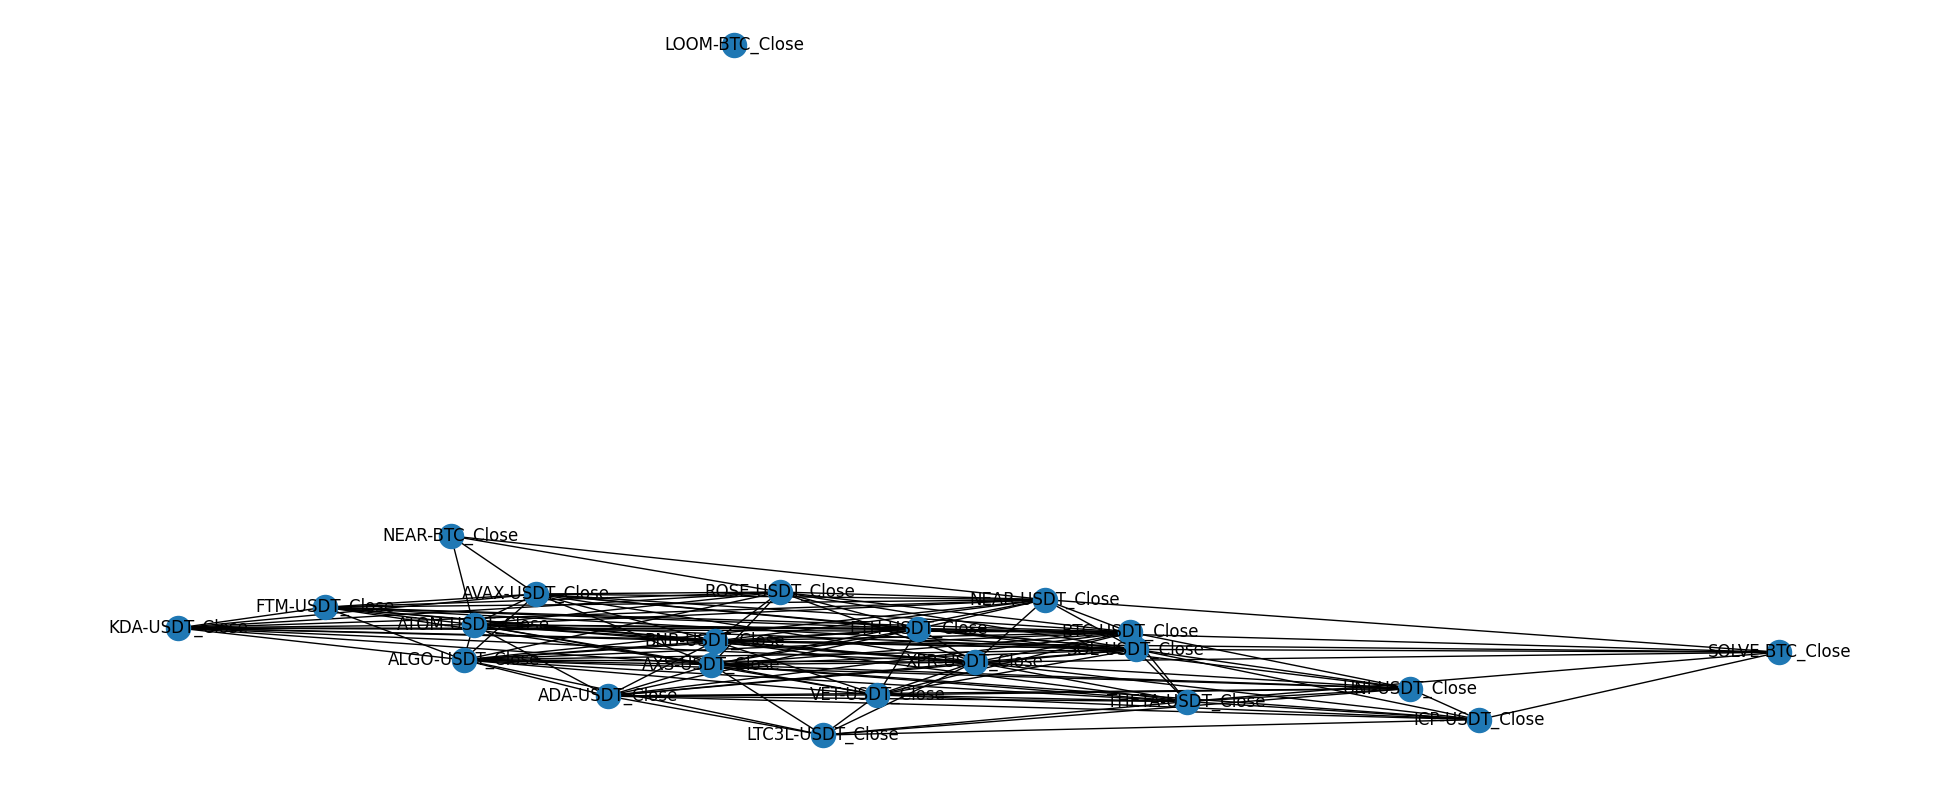

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(25, 10))


graph = nx.from_pandas_adjacency(adjency_matrix, create_using=nx.Graph)

nx.draw(graph, with_labels=True)

plt.show()